# Profit Maximizing Input Choices

Consider the profit maximization problem a firm facing production technology $A\cdot F(K, L)$ with inputs $K,L$ having market prices of $r, w > 0$ respectively and can sell its product at price $p>0$.

\begin{align}
    \max_{K,L \geq 0} \; A\cdot F(K, L) p - rK - wL
\end{align}

Assume that the technology is convex and captial instensive such that output can be described from inputs as

\begin{align}
    A \cdot F(K, L) = A \cdot K^{2/3}\cdot L^{1/3}
\end{align}

where $A > 0$ is a constant representing a total factor productivity.

In [6]:
from sympy import *
init_printing()

In [7]:
# Declare the symbols we need to setup
# the firm's profit maximization problem.
K, L, w, r, A, p = symbols('K L w r A p',
                             positive=True,
                             real=True,
                             finite=True)

a = Rational(1,2)
b = Rational(1,3)

In [8]:
# Assume Cobb-Douglas production technology
F = A * (K**a) * (L**b)

# Firm faces input prices:
#    w <-- wage rate of labor
#    r <-- rental rate on capital
cost = r * K + w * L

# Firm profit is revenue - price
profit = p * F - cost

# display profit function
Eq(Symbol('\pi(K,L)'), profit)

Now that we have setup the profit function we want to identify the pair of input choices $(K, L)$ that will maximize profits.  This means we want to find at the very least a local maxima.  We have to satisfy a set of first order conditions and a second order condition.  In particular we will need the gradiant $\nabla \pi(K,L) = \mathbf{0}$ to be zero at $(K,L)$ to identify a critical point.  Next, we will determine whether such critical points are a maximum, minimum or saddle point.

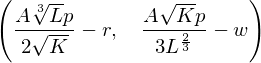

In [9]:
# Differentiate the profit function
# w.r.t. K and L.
DK = profit.diff(K)
DL = profit.diff(L)

DK, DL

Both of the first order conditions must be satisfied simultaneously for a critical point.  So we solve the system of two nonlinear equations,

\begin{align}
    \frac{\partial \pi(K,L)}{\partial K} &= 0 \\
    \frac{\partial \pi(K,L)}{\partial L} &= 0
\end{align}

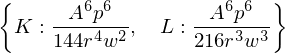

In [10]:
sols = solve([DK, DL],[K, L], dict=True)[0]
sols

The above solutions for $(K, L)$ give values in terms of constant parameters that satisfy the first order condition, making $(K, L)$ a critical point.  Next, we need to test the second order condition by deriving the matrix of second partial derivatives, known as a Hessian matrix.

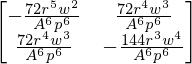

In [13]:
# Derive the second and cross-partial
# derivatives of the profit function
# and substitute in the values (K, L)
# we found as critical points.
pi_KK = DK.diff(K).subs({K: sols[K], L: sols[L]})
pi_KL = DK.diff(L).subs({K: sols[K], L: sols[L]})
pi_LL = DL.diff(L).subs({K: sols[K], L: sols[L]})
pi_LK = DL.diff(K).subs({K: sols[K], L: sols[L]})

# Place the derivatives into a matrix
# in the proper order.
hessian = Matrix([
    [pi_KK, pi_KL],
    [pi_LK, pi_LL]
])

hessian

Now that we have the Hessian matrix for this problem, we need to determine whether it is negative-definite.  In a univariate optimization problem with maximand $f(x)$ the second order test for a maximum is $f''(x^*) < 0$ where $x^*$ solves $f'(x^*) = 0$ (or its a critical point).  The analog to this in multivariate optimization is to identify the signs of principal minors of the matrix or its eigenvalues to determine whether the matrix is "positive" (positive definite) or "negative" (negative definite) or zero.

In this case, the $2\times 2$ Hessian matrix will be negative definite (a maximum) if when evaluated at the $(K^*,L^*)$ that satisfy the first order condition the following holds.

1. $\pi_{KK}(K^*, L^*) < 0$, and
2. $\det(\text{Hessian}(K^*,L^*)) > 0$

In [14]:
# For the first condition we substitute in
# the optimal choices (K, L) into the derivative
# function obtained earlier and test its sign.
pm1 = pi_KK.subs({K: sols[K], L: sols[L]})
pm1.is_negative
# Is it negative?  YES.

True

In [17]:
# Calculate the determinate of the Hessian
# evaluated at the critical point and test
# its sign.
detH = hessian.det()
detH.is_positive
# Is it positive? YES.

True